In [186]:
import numpy as np
from math import pi, sqrt, tanh
import matplotlib.pyplot as plt
# from quimb import *
import time


In [190]:
Nrep=400

Nc=100
Nab=60

neg=np.zeros(Nrep)
v1=np.zeros(Nrep*(Nab+Nc))
v2=np.zeros(Nrep*Nab)

t_timer=time.time()
# np.random.seed(1)

for i_r in range(Nrep):
    print(i_r, end='\r')
    #### no symmetry
    X=np.random.randn(Nab,Nc)+1j*np.random.randn(Nab,Nc)
    Xdag=np.matrix(X).H
    mat=np.dot(X,Xdag)
    normalization= np.trace(mat)
    H0 = np.block([[ np.zeros((Nab,Nab)),  X],\
                   [Xdag ,np.zeros((Nc,Nc))]])
    l1T=np.linalg.eigvalsh(H0)
    v1[i_r*(Nab+Nc):(i_r+1)*(Nab+Nc)] = l1T/np.real(normalization**0.5)

    v2[i_r*Nab:(i_r+1)*Nab] = np.linalg.eigvalsh(mat)/np.real(normalization)

elapsed = time.time() - t_timer
print("Finished, elapsed time = %.2f " % (elapsed)+ "sec")

Finished, elapsed time = 2.07 sec


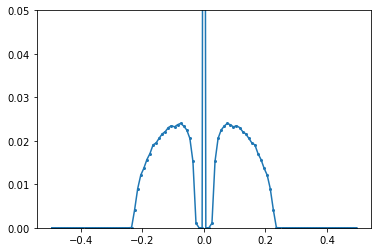

In [191]:
num_bins = 50
bin0= np.linspace(0.001,.5,num_bins+1)
bin1=np.concatenate((-bin0[::-1],bin0),axis=0)

plt.figure()
# n, bin_edges = np.histogram(v1, bins=bin1)
# bins_center1= (bin_edges[0:num_bins]+ bin_edges[1:])/2
# n1= n/np.sum(n)/(bin_edges[1]-bin_edges[0])
# # plt.plot(bins_center1,n1,'o-',markersize=2)
# plt.plot(bins_center1**2,n1/bins_center1*(2*Nc/(Nc+Nab)),'o-',markersize=2)

# n, bin_edges = np.histogram(v2, bins=bin0**2)
# bins_center2= (bin_edges[0:num_bins]+ bin_edges[1:])/2
# n2= n/np.sum(n)/(bin_edges[1]-bin_edges[0])
# plt.plot(bins_center2,n2,'o-',markersize=2)

n1, bin_edges = np.histogram(v1, bins=bin1)
bins_center1= (bin_edges[0:-1]+ bin_edges[1:])/2
n1= n1/np.sum(n1)
plt.plot(bins_center1,n1,'o-',markersize=2)
# plt.plot(bins_center1**2,n1*((Nc+Nab)/Nab),'-',markersize=2)

# n2, bin_edges = np.histogram(v2, bins=bin0**2)
# bins_center2= (bin_edges[0:num_bins]+ bin_edges[1:])/2
# n2= n2/np.sum(n2)
# plt.plot(bins_center2,n2,'o',markersize=2)

# plt.legend()
plt.ylim(0,.05)
# plt.xlim(0,0.02)
plt.show()


In [181]:
# np.concatenate((-bin0[-1:0],bin0),axis=0)
bin1

array([-0.2    , -0.19602, -0.19204, -0.18806, -0.18408, -0.1801 ,
       -0.17612, -0.17214, -0.16816, -0.16418, -0.1602 , -0.15622,
       -0.15224, -0.14826, -0.14428, -0.1403 , -0.13632, -0.13234,
       -0.12836, -0.12438, -0.1204 , -0.11642, -0.11244, -0.10846,
       -0.10448, -0.1005 , -0.09652, -0.09254, -0.08856, -0.08458,
       -0.0806 , -0.07662, -0.07264, -0.06866, -0.06468, -0.0607 ,
       -0.05672, -0.05274, -0.04876, -0.04478, -0.0408 , -0.03682,
       -0.03284, -0.02886, -0.02488, -0.0209 , -0.01692, -0.01294,
       -0.00896, -0.00498, -0.001  ,  0.001  ,  0.00498,  0.00896,
        0.01294,  0.01692,  0.0209 ,  0.02488,  0.02886,  0.03284,
        0.03682,  0.0408 ,  0.04478,  0.04876,  0.05274,  0.05672,
        0.0607 ,  0.06468,  0.06866,  0.07264,  0.07662,  0.0806 ,
        0.08458,  0.08856,  0.09254,  0.09652,  0.1005 ,  0.10448,
        0.10846,  0.11244,  0.11642,  0.1204 ,  0.12438,  0.12836,
        0.13234,  0.13632,  0.1403 ,  0.14428,  0.14826,  0.15